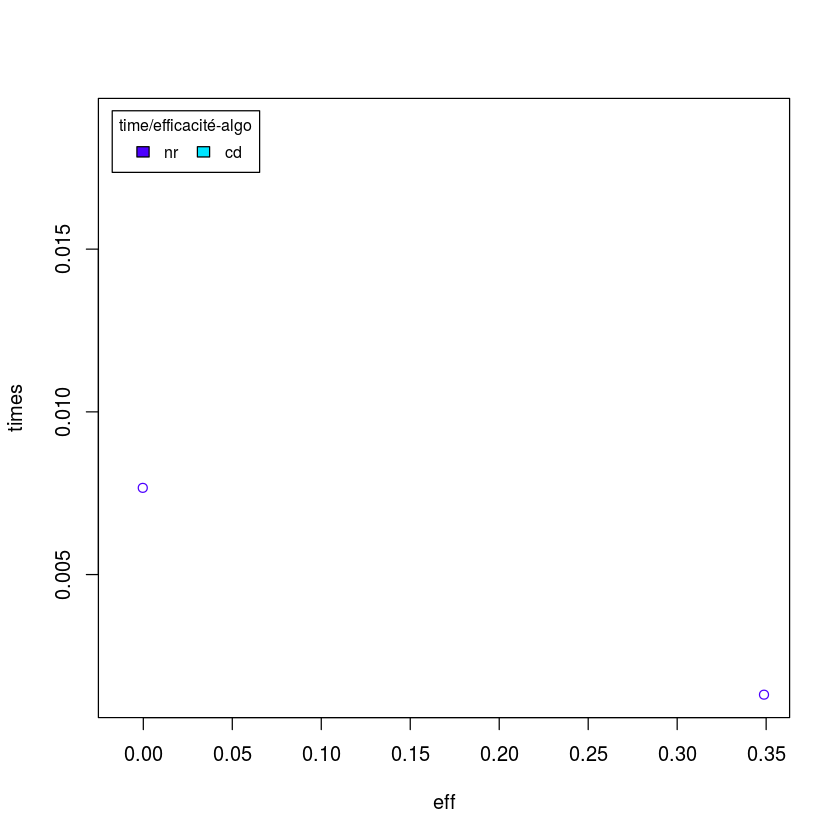

In [1]:
datas <- read.csv("results/estimation.csv",sep = ",",h=F, col.names = c('dim','algo','time','efficacity'))
times <- datas$time
eff <- datas$efficacity
plot(eff,times,col =topo.colors(2))
legend("topleft", inset=.02, title="time/efficacité-algo",c("nr","cd"), fill=topo.colors(2), horiz=TRUE, cex=0.8,)

In [2]:
datas

dim,algo,time,efficacity
5,cd,0.001310110,0.3487933550
10,nr,0.018927097,-0.0108536589
10,cd,0.007664919,-0.0003034121
